<a href="https://www.kaggle.com/code/prasadposture121/kaggle-s-ml-and-ds-survey-2022?scriptVersionId=112931642" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kaggle's ML and DS Survey 2022

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [3]:
df.shape #number of rows and columns

(23998, 296)

### Undestanding the dataset:  
* Interpreting the dimensions of the data :
* What is each row?<br>
A participant's response to the survey
* What is each column?<br>
The set of all answers to a given question

In [4]:
#How do we get the row
df.loc[0]

Duration (in seconds)                                Duration (in seconds)
Q2                                             What is your age (# years)?
Q3                                  What is your gender? - Selected Choice
Q4                               In which country do you currently reside?
Q5                       Are you currently a student? (high school, uni...
                                               ...                        
Q44_8                    Who/what are your favorite media sources that ...
Q44_9                    Who/what are your favorite media sources that ...
Q44_10                   Who/what are your favorite media sources that ...
Q44_11                   Who/what are your favorite media sources that ...
Q44_12                   Who/what are your favorite media sources that ...
Name: 0, Length: 296, dtype: object

In [5]:
#How do we get the list of columns?
df.columns

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)

In [6]:
#How to select a particular column?
colname='Duration (in seconds)'
df[colname] #gives the needed column

0        Duration (in seconds)
1                          121
2                          462
3                          293
4                          851
                 ...          
23993                      331
23994                      330
23995                      860
23996                      597
23997                      303
Name: Duration (in seconds), Length: 23998, dtype: object

Based on the duration one can draw conclusion about how many of the people just opened and closed the survey without taking any time or how many people just kept it open for longer duration because they might have forgotten about it.

In [7]:
#df[colname].min() : can't use this here, since the first contains string

**Checking the 'type' of a column**

In [8]:
df[colname].dtype

dtype('O')

In [9]:
duration=df[colname].iloc[1:]

In [10]:
duration.head()
#it still shows the type of object

1    121
2    462
3    293
4    851
5    232
Name: Duration (in seconds), dtype: object

In [11]:
#changing the changing the data type here
pd.to_numeric(duration)

1        121
2        462
3        293
4        851
5        232
        ... 
23993    331
23994    330
23995    860
23996    597
23997    303
Name: Duration (in seconds), Length: 23997, dtype: int64

In [12]:
dr=pd.to_numeric(duration)
dr.min(),dr.max()

(120, 2533678)

In [13]:
#or we can find it using another way
duration_in_ints=duration.apply(lambda x: int(x))#typecasts each entry of the column as int
duration_in_ints.head()

1    121
2    462
3    293
4    851
5    232
Name: Duration (in seconds), dtype: int64

In [14]:
duration_in_ints.min(),duration_in_ints.max()

(120, 2533678)

In [15]:
duration_in_ints=duration.astype(int)

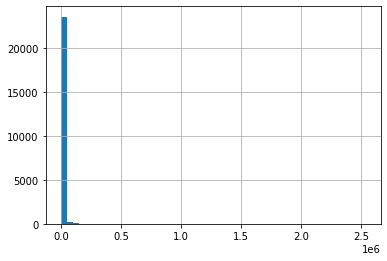

In [16]:
%matplotlib inline
ax=duration_in_ints.hist(bins=50)

It seems the the large data is gathered in the first few bins that is this contains outliers, which we will have to remove for proper error free analysis.

### Headers
We can see two potential headers in here. We will use one for analysis and save another in a dictionary, so can we can access to it anytime we want.

In [17]:
#Reading with two headers
df=pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv', header=[0,1])
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [18]:
#Accessing the question
df['Q2']

,What is your age (# years)?
0,30-34
1,30-34
2,18-21
3,55-59
4,45-49
...,...
23992,22-24
23993,60-69
23994,25-29
23995,35-39


In [19]:
#Accessing the values of the columns
df['Q2','What is your age (# years)?']

0        30-34
1        30-34
2        18-21
3        55-59
4        45-49
         ...  
23992    22-24
23993    60-69
23994    25-29
23995    35-39
23996    18-21
Name: (Q2, What is your age (# years)?), Length: 23997, dtype: object

keeping the first level of indexing on the dataframe and the second level only for reference

In [20]:
dict(df.columns)

{'Duration (in seconds)': 'Duration (in seconds)',
 'Q2': 'What is your age (# years)?',
 'Q3': 'What is your gender? - Selected Choice',
 'Q4': 'In which country do you currently reside?',
 'Q5': 'Are you currently a student? (high school, university, or graduate)',
 'Q6_1': 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera',
 'Q6_2': 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX',
 'Q6_3': 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses',
 'Q6_4': 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp',
 'Q6_5': 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai',
 'Q6_6': 'On which platforms have you begun or completed

Since now that we know which code corresponds to which level we can get rid of the second level columns.

In [21]:
question_codes=dict(df.columns)
xdf=df.droplevel(1,axis=1)

#### How to find what is the question based on the question number?

In [22]:
#what is question 2?
question_codes['Q2']

'What is your age (# years)?'

In [23]:
#what is question 3?
question_codes['Q3']

'What is your gender? - Selected Choice'

#### What is the gender ratio in this survey?

In [24]:
#getting the unique values of the gender column
xdf['Q3'].unique()

array(['Man', 'Woman', 'Prefer not to say', 'Nonbinary',
       'Prefer to self-describe'], dtype=object)

In [25]:
#number of unique values
xdf['Q3'].nunique()

5

In [26]:
#values of the each gender
xdf['Q3'].value_counts()

Man                        18266
Woman                       5286
Prefer not to say            334
Nonbinary                     78
Prefer to self-describe       33
Name: Q3, dtype: int64

In [27]:
#we wil find the  % of these values
(xdf['Q3'].value_counts()/xdf.shape[0])*100

Man                        76.117848
Woman                      22.027753
Prefer not to say           1.391841
Nonbinary                   0.325041
Prefer to self-describe     0.137517
Name: Q3, dtype: float64

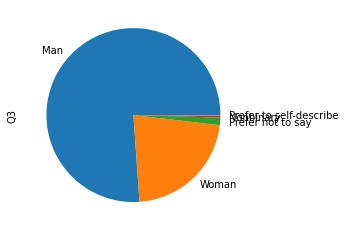

In [28]:
#Plotting pie chart with help of the gender ratio data
((xdf['Q3'].value_counts()/xdf.shape[0])*100).plot(kind='pie');

In [29]:
#getting stastical measures of the categorical data
xdf['Q3'].describe() 

count     23997
unique        5
top         Man
freq      18266
Name: Q3, dtype: object

In [30]:
#getting stastical measures of the numerical data
xdf['Duration (in seconds)'].describe()

count    2.399700e+04
mean     1.009010e+04
std      1.115403e+05
min      1.200000e+02
25%      2.640000e+02
50%      4.140000e+02
75%      7.150000e+02
max      2.533678e+06
Name: Duration (in seconds), dtype: float64

Let's analyze the data about the contry of residence.

In [31]:
xdf['Q4'].describe()

count     23997
unique       58
top       India
freq       8792
Name: Q4, dtype: object

#### Let's look at the top contry of residence i.e. India

In [32]:
#Creating seperate dataframe for the data of the Indians
India=xdf[xdf['Q4']=='India']
India.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,277,18-21,Woman,India,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
6,1550,18-21,Man,India,Yes,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
12,7548,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploring salaries in India

In [33]:
question_codes['Q29']

'What is your current yearly compensation (approximate $USD)?'

In [34]:
India['Q29'].head()
#ugh lot of null values

0     NaN
4     NaN
5     NaN
6     NaN
12    NaN
Name: Q29, dtype: object

In [35]:
#counting the null values
isna=India['Q29'].isna().sum()
isna

6464

In [36]:
notna=India['Q29'].notnull().sum()
notna

2328

In [37]:
total_values=isna+notna
print('Percentage of null values: {} %'.format((isna/total_values)*100))
print('Percentage of not null values: {}%'.format((notna/total_values)*100))

Percentage of null values: 73.5213830755232 %
Percentage of not null values: 26.478616924476796%


Insight :

In [38]:
#Dropping the null values
India.dropna(subset=['Q29'],inplace=True)
India['Q29'].head()

43    30,000-39,999
57    25,000-29,999
74      3,000-3,999
75      7,500-9,999
97    20,000-24,999
Name: Q29, dtype: object

In [39]:
#How do we remove the dollar symbol?
remove_dollar=lambda x: x.replace('$','')
India['Q29']=India['Q29'].apply(remove_dollar)
India['Q29'].head()

43    30,000-39,999
57    25,000-29,999
74      3,000-3,999
75      7,500-9,999
97    20,000-24,999
Name: Q29, dtype: object

Remove the commas with Pandas string function

In [40]:
#We need to remove commas in order to treat these entries as numeric
India['Q29']=India['Q29'].str.replace(',','')
India['Q29'].head()

43    30000-39999
57    25000-29999
74      3000-3999
75      7500-9999
97    20000-24999
Name: Q29, dtype: object

In [41]:
#Getting min/max values from the salary range
India['Q29'].str.split('-').head()

43    [30000, 39999]
57    [25000, 29999]
74      [3000, 3999]
75      [7500, 9999]
97    [20000, 24999]
Name: Q29, dtype: object

In [42]:
#Creating new column as salary range
India['salary_range']=India['Q29'].str.split('-')
India.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,salary_range
43,1162,22-24,Man,India,No,Coursera,NaN,NaN,NaN,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,"[30000, 39999]"
57,895,35-39,Man,India,No,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,...,NaN,"Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...","Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,"[25000, 29999]"
74,13731,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[3000, 3999]"
75,592,25-29,Man,India,No,Coursera,NaN,NaN,NaN,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,"[7500, 9999]"
97,963,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,"[20000, 24999]"


In [43]:
# Getting min and max salaries form the range
# India['s_min']=India['salary_range'].apply(lambda x: x[0])
# India['s_max']=India['salary_range'].apply(lambda x: x[1])
# The above code gives error since some of the lists have only one entry

In [44]:
#Fiind the length of each element in the 'salary_range' column
l=India['salary_range'].apply(len)

In [45]:
l.min() #so there are lists containing only one element which is why we cant find x[0]

1

In [46]:
#Modifying the lambda function while taking the lists with single entry into account
India['s_min']=India['salary_range'].apply(lambda x: x[0])
India['s_max']=India['salary_range'].apply(lambda x: x[1] if len(x)==2 else x[0])

In [47]:
India['s_min'] #minimums of the list

43        30000
57        25000
74         3000
75         7500
97        20000
          ...  
23947         0
23955      7500
23981    100000
23989      2000
23990         0
Name: s_min, Length: 2328, dtype: object

In [48]:
India['s_max'] #maximum of the list

43        39999
57        29999
74         3999
75         9999
97        24999
          ...  
23947       999
23955      9999
23981    124999
23989      2999
23990       999
Name: s_max, Length: 2328, dtype: object

In [49]:
# replace the '> 500000' with'500000'
India['s_min']=India['s_min'].str.replace('>','')

In [50]:
India[['salary_range','s_min','s_max']].tail()

,salary_range,s_min,s_max
23947,"[0, 999]",0,999
23955,"[7500, 9999]",7500,9999
23981,"[100000, 124999]",100000,124999
23989,"[2000, 2999]",2000,2999
23990,"[0, 999]",0,999


In [51]:
India[['s_min','s_max']].describe()
#it is still an object

,s_min,s_max
count,2328,2328
unique,26,26
top,0,999
freq,450,450


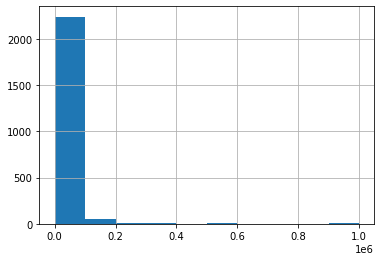

In [52]:
India['s_min'].astype(int).hist();

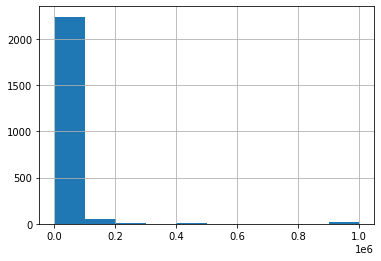

In [53]:
India['s_max']=India['s_max'].str.replace('>','') #replacing the symbol
India['s_max'].astype(int).hist();#plotting the histogram

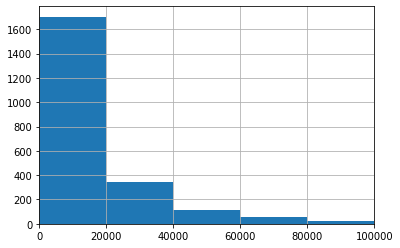

In [54]:
ax=India['s_min'].astype(int).hist(bins=50)
ax.set_xlim(0,100000);

In [55]:
question_codes['Q23']

'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'

In [56]:
India['Q23'].head()

43                     Machine Learning/ MLops Engineer
57                                       Data Scientist
74    Data Analyst (Business, Marketing, Financial, ...
75    Data Analyst (Business, Marketing, Financial, ...
97    Data Analyst (Business, Marketing, Financial, ...
Name: Q23, dtype: object

In [57]:
India['Q23'].value_counts()

Data Scientist                                                      468
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    414
Software Engineer                                                   296
Teacher / professor                                                 275
Other                                                               191
Manager (Program, Project, Operations, Executive-level, etc)        184
Machine Learning/ MLops Engineer                                    149
Engineer (non-software)                                             125
Data Engineer                                                        84
Research Scientist                                                   70
Data Architect                                                       23
Statistician                                                         23
Data Administrator                                                   14
Developer Advocate                                              

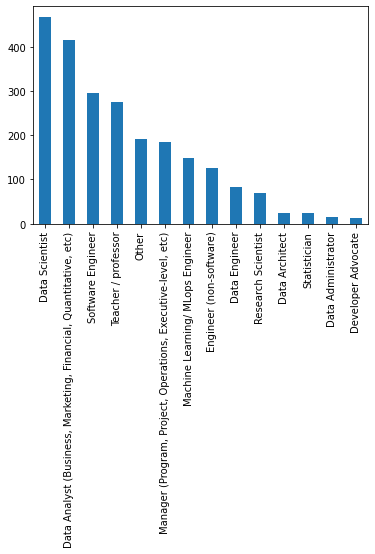

In [58]:
#Plotting barchart of the job titles and number of people
India['Q23'].value_counts().plot(kind='bar');

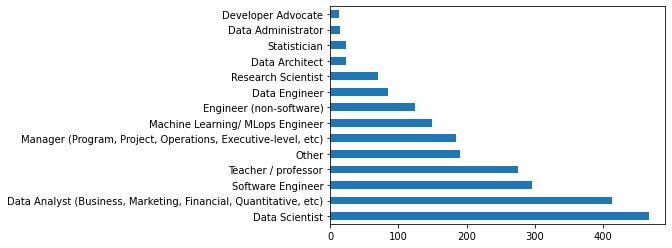

In [59]:
#Plotting horizontal bar chart
India['Q23'].value_counts().plot(kind='barh');
#kaggle being the data science platform it is obvious that number of data scientists are maximum in this data

#### Which job title has the highest average salary?

In [60]:
India[['s_min','Q23']].head()

,s_min,Q23
43,30000,Machine Learning/ MLops Engineer
57,25000,Data Scientist
74,3000,"Data Analyst (Business, Marketing, Financial, ..."
75,7500,"Data Analyst (Business, Marketing, Financial, ..."
97,20000,"Data Analyst (Business, Marketing, Financial, ..."


In [61]:
job_title_counts=India['Q23'].value_counts()
job_title_counts

Data Scientist                                                      468
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    414
Software Engineer                                                   296
Teacher / professor                                                 275
Other                                                               191
Manager (Program, Project, Operations, Executive-level, etc)        184
Machine Learning/ MLops Engineer                                    149
Engineer (non-software)                                             125
Data Engineer                                                        84
Research Scientist                                                   70
Data Architect                                                       23
Statistician                                                         23
Data Administrator                                                   14
Developer Advocate                                              

In [62]:
SALARIES={}
for job_title, counts in job_title_counts.iteritems():
    small_df=India[India['Q23']==job_title]
    salary=small_df['s_min'].astype(int)
    avg_salary_for_title=salary.mean()
    SALARIES[job_title]=avg_salary_for_title
print(SALARIES)

{'Data Scientist': 30771.36752136752, 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 13840.579710144928, 'Software Engineer': 17452.702702702703, 'Teacher / professor': 15994.545454545454, 'Other': 13465.968586387435, 'Manager (Program, Project, Operations, Executive-level, etc)': 38809.782608695656, 'Machine Learning/ MLops Engineer': 26255.03355704698, 'Engineer (non-software)': 10432.0, 'Data Engineer': 18880.95238095238, 'Research Scientist': 24028.571428571428, 'Data Architect': 52608.69565217391, 'Statistician': 7434.782608695652, 'Data Administrator': 14214.285714285714, 'Developer Advocate': 33875.0}


In [63]:
salary

667        1000
3620          0
3675      10000
4168      15000
5406      25000
6181          0
9867     300000
10081      2000
14819     40000
14863      5000
17480      1000
18756      7500
Name: s_min, dtype: int64

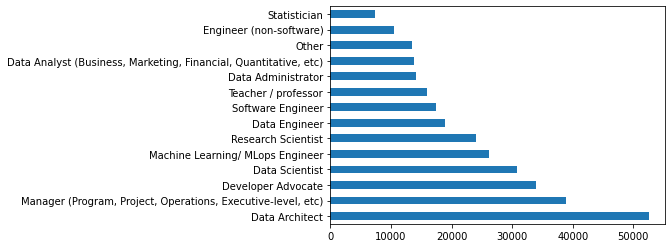

In [64]:
pd.Series(SALARIES).sort_values(ascending=False).plot(kind='barh');

#### Another way of getting average salaries of different job titles in India.

In [65]:
India['s_min']=India['s_min'].astype(int)
Salaries=India.groupby('Q23')['s_min'].mean()
Salaries

Q23
Data Administrator                                                  14214.285714
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    13840.579710
Data Architect                                                      52608.695652
Data Engineer                                                       18880.952381
Data Scientist                                                      30771.367521
Developer Advocate                                                  33875.000000
Engineer (non-software)                                             10432.000000
Machine Learning/ MLops Engineer                                    26255.033557
Manager (Program, Project, Operations, Executive-level, etc)        38809.782609
Other                                                               13465.968586
Research Scientist                                                  24028.571429
Software Engineer                                                   17452.702703
Statistician            

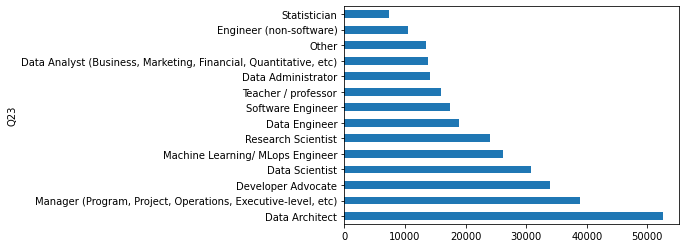

In [66]:
Salaries.sort_values(ascending=False).plot(kind='barh');

**Conclusion:** Among all the job titles Data Architect has the highest average salary.

To be continued,,,